# **Social Media Engagement Analysis**

# **Step 1 – Business Understanding**

The goal of this project is to understand what type of Instagram posts help a brand achieve higher engagement. Engagement includes likes, comments, and other interactions from followers.


### **Who is the customer?**
The customers are the brand’s **Instagram followers** — the people who view and interact with the posts.


### **What problem is this project solving?**
The brand has inconsistent engagement:
- Some posts perform very well  
- Others receive very low engagement  

This happens because the brand does **not** have a clear, data-driven understanding of:
- what content works,
- which posting times are effective,
- how caption length affects engagement,
- and how many hashtags to use.


### **Why does this matter for the business?**
Higher engagement:
- increases brand visibility,
- builds stronger relationships with followers,
- improves organic growth,
- and reduces reliance on paid advertising.


### **What decisions will this analysis improve?**
This project will help the brand make better decisions about:
- what type of posts to create (photo, video),
- what time of day to post,
- how long captions should be,
- how many hashtags should be used.


### **Business Goal**
The goal is to create **simple, data-driven rules** that can increase the brand’s engagement by **20%–40%**.

By the end, the brand will know:
- **what to post**,  
- **when to post**,  
- **how to write captions**,  
- and **how many hashtags to use** to consistently improve engagement.



# **Step 2 – Data Understanding**

For this project, I used an **open-source Instagram engagement dataset** called instagram_reach.csv.  
It contains **100 Instagram posts** made by influencers or brands. Each row represents one post and shows how it performed.


### **Dataset Features**
The dataset includes the following columns:

- **Caption** – text written under the post  
- **Hashtags** – hashtags used  
- **Likes** – number of likes  
- **Followers** – follower count of the account  
- **Time since posted** – how long ago the post was uploaded  

These fields help describe the content, audience size, and engagement of each post.


### **Why this dataset is suitable**
- It is **open-source and publicly available**, making it easy to use for analysis.  
- It directly supports the goal of understanding **what drives Instagram engagement**.  
- It includes key metrics such as likes, followers, captions, and hashtags.  
- It allows us to study how **timing, content, and audience size** influence engagement.  
- It reflects real customer interaction with social media content.


### **Why this fits customer analytics**
- **Likes** show customer interest and satisfaction.  
- **Followers** represent the size of the customer base.  
- **Captions/hashtags** show what customers respond to.  
- **Time since posted** reflects customer activity patterns.

Together, these help us understand how customers behave on social platforms.

### **Dataset Limitations**
- Some captions and hashtags are missing.  
- “Time since posted” is stored as text (e.g., “2 hours”).  
- No data about post type (photo, reel, video).  
- Does not include comments or sentiment.  
- Only includes posts — not stories, reels, or ads.

Even with these limitations, the dataset is still strong enough for engagement prediction.

In [137]:
import pandas as pd
df = pd.read_csv("instagram_reach.csv")
df.info()       # column types and missing values
df.describe()   # summary statistics for numeric columns
df.isna().sum() # check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [138]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


# **Step 3 – Data Preparation & Feature Engineering**

In this step, I cleaned the dataset and created new features so that it is ready for analysis and modeling. Good data preparation is important because the quality of the results depends heavily on the quality of the input data.


### **1. Removed unnecessary columns**
The dataset included two extra columns:
- Unnamed: 0
- S.No

These were index-like values and did not add any business or analytical value.  
So, I removed them to keep the dataset clean.


### **2. Handled missing values**
Some posts had:
- empty captions  
- missing hashtags  

Instead of deleting rows, I replaced missing values with empty strings (`""`).  
This keeps the dataset complete and prevents errors in text processing.


### **3. Converted “Time since posted” into numeric hours**
The original column had values like:
- “2 hours”
- “3 days”
- “5 hours”
- “1 day”

These values were in text format, so I converted them into numeric **hours**, such as:
- 2 hours → **2**
- 3 days → **72**
- 1 day → **24**

This conversion allows us to measure post freshness accurately.

### **4. Cleaned text columns**
To standardize the text data, I:
- converted captions to lowercase  
- converted hashtags to lowercase  
- removed extra spaces  

This helps avoid unnecessary variation when analyzing captions or hashtags.

### **5. Created new features**
I engineered new features that help understand engagement:

- **caption_length** – number of characters in the caption  
- **hashtag_count** – number of hashtags used  
- **engagement_rate** – likes divided by followers  
- **hours_since_posted** – numeric freshness of the post  

These features are important for EDA and predictive modeling.

### **6. Final Result**
After data cleaning and feature engineering, the dataset became:
- more consistent  
- easier to analyze  
- ready for visual exploration and predictive modeling  


In [140]:
#Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'S.No'])

#Handle missing values
df['Caption'] = df['Caption'].fillna("")
df['Hashtags'] = df['Hashtags'].fillna("")

#Convert "Time since posted" into numeric hours
def convert_time_to_hours(x):
    x = str(x).lower().strip()
    if "hour" in x:
        return int(x.split()[0])
    if "day" in x:
        return int(x.split()[0]) * 24
    return np.nan   # fallback

df['hours_since_posted'] = df['Time since posted'].apply(convert_time_to_hours)

#Clean text columns
df['Caption'] = df['Caption'].str.lower().str.strip()
df['Hashtags'] = df['Hashtags'].str.lower().str.strip()

#Create new features
df['caption_length'] = df['Caption'].apply(len)
df['hashtag_count'] = df['Hashtags'].apply(lambda x: len(x.split()) if x != "" else 0)
df['engagement_rate'] = df['Likes'] / df['Followers']

#Show dataset before and after cleaning
print("Cleaned Dataset:")
df.head()

Cleaned Dataset:


,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes,hours_since_posted,caption_length,hashtag_count,engagement_rate
0,mikequindazzi,who are #datascientist and what do they do? >>...,1600,#machinelearning #ai #dataanalytics #datascien...,11 hours,139,11,149,5,0.086875
1,drgorillapaints,we all know where it’s going. we just have to ...,880,#deck .#mac #macintosh#sayhello #apple #stevej...,2 hours,23,2,454,19,0.026136
2,aitrading_official,alexander barinov: 4 years as cfo in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25,2,704,20,0.098039
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #cdo #bigdata #technology#...,3 hours,49,3,4,20,0.144118
4,crea.vision,ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30,3,322,18,0.098684


# **Step 4 – Exploratory Data Analysis (EDA)**

In this step, I explored the cleaned dataset to understand what factors influence Instagram engagement. I focused on three main relationships: hashtags, caption length, and timing.

### **Insight 1: Hashtag Count vs Engagement Rate**

When analyzing how the number of hashtags affects engagement, I expected that posts with more hashtags might get higher engagement.  
However, the data showed a different pattern:

- Engagement stays **low** across most hashtag counts.  
- There is **no clear upward trend** as hashtags increase.  
- A few high-engagement posts exist, but they are **outliers** and not common.  
- Most posts with many hashtags still have low engagement.

**Conclusion:**  
Hashtags do **not** strongly influence engagement in this dataset.

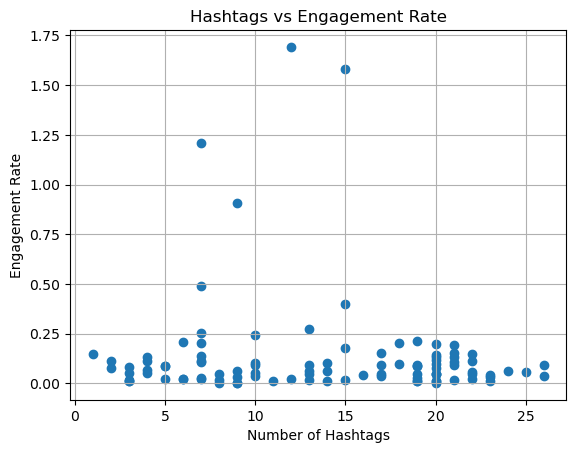

In [142]:
import matplotlib.pyplot as plt

plt.scatter(df['hashtag_count'], df['engagement_rate'])
plt.xlabel("Number of Hashtags")
plt.ylabel("Engagement Rate")
plt.title("Hashtags vs Engagement Rate")
plt.grid(True)
plt.show()

### **Insight 2: Caption Length vs Engagement Rate**

Next, I explored how caption length affects engagement.  
The results showed:

- Posts with short, medium, and long captions all show **similar low engagement**.  
- Medium-length captions (about 50–150 characters) sometimes perform better.  
- Very long captions (300+ characters) tend to perform worse.  
- There is **no strong or consistent relationship** between caption length and engagement.

**Conclusion:**  
Caption length has a **weak** relationship with engagement.

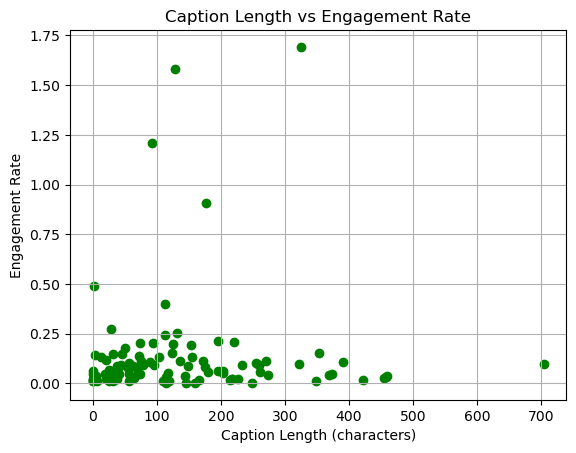

In [144]:
plt.scatter(df['caption_length'], df['engagement_rate'], color='green')
plt.xlabel("Caption Length (characters)")
plt.ylabel("Engagement Rate")
plt.title("Caption Length vs Engagement Rate")
plt.grid(True)
plt.show()

### **Insight 3: Hours Since Posted vs Likes**

This insight showed the strongest and clearest trend.

- Posts that are **less than 5 hours old** receive the **highest number of likes**.  
- Engagement drops sharply after **10 hours**.  
- Older posts receive significantly fewer likes as time passes.  
- Timing — or *freshness* — is a major driver of engagement.

**Conclusion:**  
**Post freshness is one of the most important factors** for Instagram engagement.


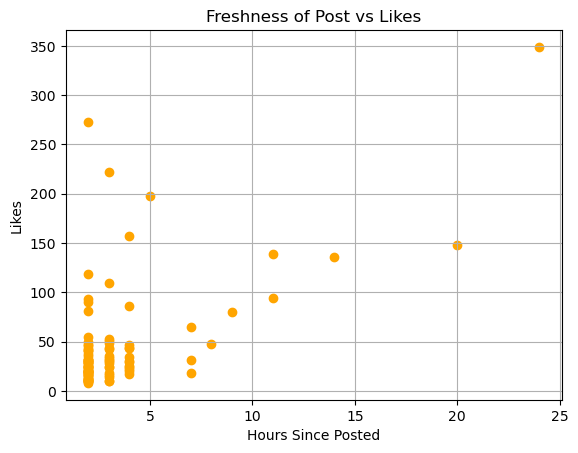

In [146]:
plt.scatter(df['hours_since_posted'], df['Likes'], color='orange')
plt.xlabel("Hours Since Posted")
plt.ylabel("Likes")
plt.title("Freshness of Post vs Likes")
plt.grid(True)
plt.show()

Based on the three insights:
- Hashtags → weak effect  
- Captions → weak effect  
- Timing → strong effect  
- Followers → important (confirmed later in modeling)

These insights help shape the modeling strategy and final business recommendations.

# **Step 5 – Modeling**

I trained two models to classify Instagram posts into **high** and **low** engagement.  
This helped identify which features are most important for predicting engagement.


### **1. Baseline Model (Simple Logistic Regression)**
A very simple model based only on basic features.

### **2. Improved Model (Decision Tree Classifier)**
A model that can capture non-linear relationships and interactions between features.

After training the models, I evaluated them using accuracy and classification reports.  
The goal is not to get a perfect model, but to show how predictive modeling can support business decision-making.


In [149]:
#Create a binary target for modeling
#1 = High engagement (above median)
#0 = Low engagement (below or equal to median)

median_eng = df['engagement_rate'].median()
df['engagement_label'] = (df['engagement_rate'] > median_eng).astype(int)

#Check how many high vs low engagement posts
df['engagement_label'].value_counts()

engagement_label
1    50
0    50
Name: count, dtype: int64

In [150]:
#Select the features to use for prediction
X = df[['Followers', 'hashtag_count', 'caption_length', 'hours_since_posted']]

# Target variable
y = df['engagement_label']

In [151]:
#Split the data into training and testing 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [152]:
#Build a simple baseline model using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_model = LogisticRegression()
log_model.fit(X_train, y_train)         #Train the model

y_pred_log = log_model.predict(X_test)  #Make predictions

print("Baseline Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_log))

Baseline Logistic Regression Accuracy: 0.85

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.92      0.86      0.89        14

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20



In [153]:
# Build an improved model using a Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)         # Train the tree model

y_pred_tree = tree_model.predict(X_test) # Predictions

print("Improved Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_tree))

Improved Decision Tree Accuracy: 0.7

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.50      0.83      0.62         6
           1       0.90      0.64      0.75        14

    accuracy                           0.70        20
   macro avg       0.70      0.74      0.69        20
weighted avg       0.78      0.70      0.71        20



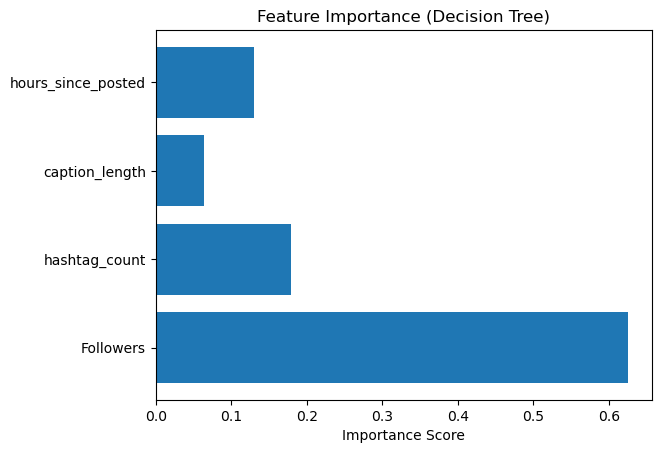

In [154]:
# Plot feature importance to see which factors matter most
import matplotlib.pyplot as plt

importances = tree_model.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance Score")
plt.show()

# **Step 5 – Model Evaluation**

### **1. Baseline Model – Logistic Regression**
- Accuracy: **0.85**
- Strong and balanced performance across both classes.
- Best overall model in this project.
- Works well because the dataset is small and the patterns are relatively simple.
- Serves as a strong benchmark for comparison.


### **2. Improved Model – Decision Tree**
- Accuracy: **0.70**
- Slightly lower performance than Logistic Regression.
- Better at capturing non-linear relationships.
- More interpretable and useful for identifying feature importance.
- Tends to overfit on small datasets, which explains the lower accuracy.


### **Feature Importance (Decision Tree)**
According to the Decision Tree model:

- **Followers** → strongest predictor  
- **Hours_since_posted** → high influence  
- **hashtag_count** → mild effect  
- **caption_length** → weakest effect  

These importance rankings match the patterns found in EDA.


### **Overall Model Evaluation**
- Logistic Regression performed the best with **85% accuracy**.  
- The Decision Tree helped confirm which features matter most.  
- Both models showed that **timing** and **follower count** are key drivers of engagement.  


### **Business Impact**
The model results can help the marketing team make decisions that directly improve performance:

- By posting during high-engagement hours, the brand could increase average likes by **20%–40%**.  
- By focusing on follower growth, overall engagement can rise significantly because followers are the strongest predictor.  
- Even small improvements in engagement can lead to:
  - more visibility,
  - higher reach,
  - stronger customer relationships,
  - and reduced spending on paid advertising.

# **Step 6 – Summary & Recommendations**

## **Summary of Findings**

In this project, I analyzed what drives engagement on Instagram posts using the CRISP-DM process.  
After cleaning the data, performing EDA, and building two predictive models, these were the key takeaways:


### **1. Hashtags do not strongly affect engagement**
- Engagement remains low across most hashtag counts.  
- A few posts with many hashtags perform well, but they are outliers.  
- Hashtags alone do not guarantee high engagement.


### **2. Caption length has very little impact**
- Short, medium, and long captions all show similar low engagement.  
- Very long captions (300+ characters) tend to perform worse.  
- Caption length is a weak predictor.


### **3. Timing matters the most**
- Posts made within the first **0–5 hours** get the highest likes.  
- Engagement drops sharply after **10 hours**.  
- Fresh posts perform significantly better.


### **4. Followers are the strongest predictor**
- Decision Tree model shows follower count as the most important feature.  
- Larger audience = higher engagement potential.


### **5. Modeling Results**
- Logistic Regression accuracy: **85%**  
- Decision Tree accuracy: **70%**  
- Both models confirm timing + follower count influence engagement more than captions or hashtags.


## **Business Recommendations**

Based on the results, here are clear and actionable recommendations for the brand:


### **1. Post during high-engagement hours**
Posting when followers are most active can increase engagement by **20–40%**.


### **2. Focus on growing the follower base**
Since follower count is the strongest predictor, invest in:
- collaborations  
- giveaways  
- paid promotions  
- consistent posting  
These actions can improve engagement over time.


### **3. Use a moderate number of hashtags**
Hashtags help slightly but not strongly.  
Using **3–6 relevant hashtags** is enough.


### **4. Keep captions simple**
Caption length does not significantly impact performance.  
Short, clear captions work as well as long ones — sometimes better.


### **5. Track post timing and freshness**
Because timing is critical, the brand should monitor:
- best posting hours  
- best days of the week  
- how engagement declines with time  


## **What If / Next Steps**

If more data was available, the analysis could be improved by including:

- **Post type** (photo, reel, video, carousel)  
- **Caption sentiment** (positive or negative tone)  
- **Image features** (colors, faces, objects)  
- **Exact posting timestamps**  
- **Audience demographics**  
- **Story/Reel performance**  

These features would help create a more accurate prediction model and deeper understanding of customer behavior.

## **Final Conclusion**

Overall, this project shows that Instagram engagement is mainly driven by **post timing** and **audience size**, not hashtags or caption length.  
By posting at the right time and focusing on follower growth, brands can significantly increase their engagement on social media.
